In [4]:

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '396e12ba-07a9-4046-8624-23bfd587d87b',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video

{'status': {'timestamp': '2023-05-15T10:58:57.077Z', 'error_code': 0, 'error_message': None, 'elapsed': 36, 'credit_count': 1, 'notice': None, 'total_count': 9668}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10208, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [5]:
type(data)

dict

In [6]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
global df
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now', utc = 'True')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10208,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.937399e+07,1.937399e+07,False,NaN,1,NaN,NaN,None,2023-05-15T10:57:00.000Z,27404.922360,1.332650e+10,44.6529,0.042480,2.098547,-1.969644,-9.959268,9.758392,25.541105,5.309426e+11,46.4721,5.755034e+11,None,2023-05-15T10:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-15 10:58:58.494967+00:00
1,1027,Ethereum,ETH,ethereum,6881,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.229623e+08,1.229623e+08,True,NaN,2,NaN,NaN,None,2023-05-15T10:57:00.000Z,1829.072813,6.262465e+09,42.0871,0.017144,1.417442,-1.573696,-13.211236,9.773756,21.074350,2.249071e+11,19.6851,2.249071e+11,None,2023-05-15T10:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-15 10:58:58.494967+00:00
2,825,Tether,USDT,tether,53378,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.280724e+10,8.609064e+10,True,NaN,3,NaN,NaN,None,2023-05-15T10:57:00.000Z,1.000362,1.991072e+10,38.8678,0.000188,-0.015212,-0.078111,-0.033328,-0.263645,-0.069325,8.283725e+10,7.2504,8.612184e+10,None,2023-05-15T10:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-15 10:58:58.494967+00:00
3,1839,BNB,BNB,bnb,1362,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558597e+08,1.558597e+08,False,NaN,4,NaN,NaN,None,2023-05-15T10:57:00.000Z,315.440375,4.339116e+08,15.2231,0.041453,1.019757,-0.745567,-5.524101,-0.793609,7.644085,4.916444e+10,4.3031,4.916444e+10,None,2023-05-15T10:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-15 10:58:58.494967+00:00
4,3408,USD Coin,USDC,usd-coin,12402,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.995494e+10,2.995494e+10,False,NaN,5,NaN,NaN,None,2023-05-15T10:57:00.000Z,0.999945,2.835059e+09,66.4594,-0.003989,-0.003007,-0.001812,0.012438,0.020003,0.007067,2.995330e+10,2.6217,2.995330e+10,None,2023-05-15T10:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-15 10:58:58.494967+00:00
5,52,XRP,XRP,xrp,944,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.183782e+10,9.998897e+10,False,NaN,6,NaN,NaN,None,2023-05-15T10:57:00.000Z,0.427412,6.143326e+08,72.7840,-0.278954,0.194006,-1.979003,-18.316611,17.047754,15.405878,2.215609e+10,1.9394,4.274116e+10,None,2023-05-15T10:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-15 10:58:58.494967+00:00
6,2010,Cardano,ADA,cardano,786,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.485272e+10,3.577770e+10,False,NaN,7,NaN,NaN,None,2023-05-15T10:57:00.000Z,0.371527,1.681220e+08,40.6512,-0.223141,1.034800,0.587803,-17.788591,13.211737,2.680742,1.294872e+10,1.1334,1.671871e+10,None,2023-05-15T10:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-15 10:58:58.494967+00:00
7,74,Dogecoin,DOGE,dogecoin,707,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.393542e+11,1.393542e+11,True,NaN,8,NaN,NaN,None,2023-05-15T10:57:00.000Z,0.072809,2.064396e+08,46.3222,-0.166658,0.970173,-2.885249,-18.912468,2.605800,-10.914252,1.014624e+10,0.8881,1.014624e+10,None,2023-05-15T10:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-15 10:58:58.494967+00:00
8,5426,Solana,SOL,solana,459,2020-04-10T00:00:00.000Z,"[pos, platform,

In [8]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '396e12ba-07a9-4046-8624-23bfd587d87b',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now', utc = 'True')
    #print(df2)
    #df = pd.concat([df, df2])
    df
    
    if not os.path.isfile(r'C:\Users\jameowen\OneDrive - Capgemini\2023\L&D\Python\Crypto API\API.csv'):
        df.to_csv(r'C:\Users\jameowen\OneDrive - Capgemini\2023\L&D\Python\Crypto API\API.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\jameowen\OneDrive - Capgemini\2023\L&D\Python\Crypto API\API.csv', mode = 'a', header=False)
    

In [ ]:
import os
from time import time
from time import sleep


for i in range(333):
    api_runner()
    print('Api ran')
    sleep(3600) #sleep for 60 seconds
exit()


Api ran
Api ran
Api ran
Api ran
Api ran
Api ran
Api ran
Api ran
Api ran
Api ran
Api ran
Api ran
Api ran
Api ran
Api ran
Api ran
Api ran
Api ran
Api ran
Api ran
Api ran
Api ran
Api ran
Api ran
Api ran
Api ran
Api ran
Api ran
Api ran
Api ran
Api ran
Api ran
Api ran
Api ran
Api ran
Api ran
Api ran
Api ran
Api ran
Api ran
Api ran
Api ran
Api ran
Api ran


In [10]:
df3 = pd.read_csv(r'C:\Users\jameowen\OneDrive - Capgemini\2023\L&D\Python\Crypto API\API.csv')
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10208,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.937392e+07,1.937392e+07,False,NaN,1,NaN,NaN,NaN,2023-05-15T08:47:00.000Z,27439.267541,1.305543e+10,40.3438,0.054952,2.099425,-1.624065,-9.772806,11.189813,26.354541,5.316063e+11,46.4622,5.762246e+11,NaN,2023-05-15T08:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-15 08:49:06.980207+00:00
1,1,1027,Ethereum,ETH,ethereum,6881,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.229623e+08,1.229623e+08,True,NaN,2,NaN,NaN,NaN,2023-05-15T08:47:00.000Z,1831.798806,6.099125e+09,36.4403,0.105994,1.511221,-0.970046,-12.595483,10.431747,22.053180,2.252422e+11,19.6908,2.252422e+11,NaN,2023-05-15T08:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-15 08:49:06.980207+00:00
2,2,825,Tether,USDT,tether,53374,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.280724e+10,8.609064e+10,True,NaN,3,NaN,NaN,NaN,2023-05-15T08:47:00.000Z,1.000475,1.926277e+10,30.9584,-0.002453,-0.002883,-0.073737,-0.030570,-0.257188,-0.059531,8.284660e+10,7.2425,8.613156e+10,NaN,2023-05-15T08:47:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-15 08:49:06.980207+00:00
3,3,1839,BNB,BNB,bnb,1362,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.558597e+08,1.558597e+08,False,NaN,4,NaN,NaN,NaN,2023-05-15T08:47:00.000Z,315.921692,4.315563e+08,13.8395,0.092313,0.957078,-0.041001,-4.642196,-1.542629,8.204611,4.923947e+10,4.3045,4.923947e+10,NaN,2023-05-15T08:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-15 08:49:06.980207+00:00
4,4,3408,USD Coin,USDC,usd-coin,12401,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.995825e+10,2.995825e+10,False,NaN,5,NaN,NaN,NaN,2023-05-15T08:47:00.000Z,1.000066,2.748714e+09,55.2340,0.000025,0.006155,0.019295,0.005923,0.024356,0.017707,2.996022e+10,2.6195,2.996022e+10,NaN,2023-05-15T08:47:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-15 08:49:06.980207+00:00
5,5,52,XRP,XRP,xrp,944,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.183782e+10,9.998897e+10,False,NaN,6,NaN,NaN,NaN,2023-05-15T08:47:00.000Z,0.427564,5.856417e+08,62.1746,0.335715,0.257593,-1.539987,-17.999270,17.324932,16.011717,2.216398e+10,1.9377,4.275638e+10,NaN,2023-05-15T08:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-15 08:49:06.980207+00:00
6,6,2010,Cardano,ADA,cardano,786,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.485272e+10,3.577770e+10,False,NaN,7,NaN,NaN,NaN,2023-05-15T08:47:00.000Z,0.372863,1.621866e+08,31.3941,-0.469219,1.422502,1.811549,-16.596456,14.162790,4.121792,1.299528e+10,1.1361,1.677883e+10,NaN,2023-05-15T08:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-15 08:49:06.980207+00:00
7,7,74,Dogecoin,DOGE,dogecoin,706,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.393530e+11,1.393530e+11,True,NaN,8,NaN,NaN,NaN,2023-05-15T08:47:00.000Z,0.073104,2.003880e+08,38.4422,0.079806,1.372560,-2.081466,-17.842712,3.543008,-10.187069,1.018728e+10,0.8907,1.018728e+10,NaN,2023-05-15T08:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-15 08:49:06.980207+00:00
8,8,5426,Solana,SOL,solana,459,2020-04-10T00:00:00.000Z,"['po

In [11]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10208,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.937399e+07,1.937399e+07,False,NaN,1,NaN,NaN,None,2023-05-15T10:57:00.000Z,27404.922360,1.332650e+10,44.6529,0.042480,2.098547,-1.969644,-9.959268,9.758392,25.541105,5.309426e+11,46.4721,5.755034e+11,None,2023-05-15T10:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-15 10:58:58.494967+00:00
1,1027,Ethereum,ETH,ethereum,6881,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.229623e+08,1.229623e+08,True,NaN,2,NaN,NaN,None,2023-05-15T10:57:00.000Z,1829.072813,6.262465e+09,42.0871,0.017144,1.417442,-1.573696,-13.211236,9.773756,21.074350,2.249071e+11,19.6851,2.249071e+11,None,2023-05-15T10:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-15 10:58:58.494967+00:00
2,825,Tether,USDT,tether,53378,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.280724e+10,8.609064e+10,True,NaN,3,NaN,NaN,None,2023-05-15T10:57:00.000Z,1.000362,1.991072e+10,38.8678,0.000188,-0.015212,-0.078111,-0.033328,-0.263645,-0.069325,8.283725e+10,7.2504,8.612184e+10,None,2023-05-15T10:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-15 10:58:58.494967+00:00
3,1839,BNB,BNB,bnb,1362,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558597e+08,1.558597e+08,False,NaN,4,NaN,NaN,None,2023-05-15T10:57:00.000Z,315.440375,4.339116e+08,15.2231,0.041453,1.019757,-0.745567,-5.524101,-0.793609,7.644085,4.916444e+10,4.3031,4.916444e+10,None,2023-05-15T10:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-15 10:58:58.494967+00:00
4,3408,USD Coin,USDC,usd-coin,12402,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.995494e+10,2.995494e+10,False,NaN,5,NaN,NaN,None,2023-05-15T10:57:00.000Z,0.999945,2.835059e+09,66.4594,-0.003989,-0.003007,-0.001812,0.012438,0.020003,0.007067,2.995330e+10,2.6217,2.995330e+10,None,2023-05-15T10:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-15 10:58:58.494967+00:00
5,52,XRP,XRP,xrp,944,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.183782e+10,9.998897e+10,False,NaN,6,NaN,NaN,None,2023-05-15T10:57:00.000Z,0.427412,6.143326e+08,72.7840,-0.278954,0.194006,-1.979003,-18.316611,17.047754,15.405878,2.215609e+10,1.9394,4.274116e+10,None,2023-05-15T10:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-15 10:58:58.494967+00:00
6,2010,Cardano,ADA,cardano,786,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.485272e+10,3.577770e+10,False,NaN,7,NaN,NaN,None,2023-05-15T10:57:00.000Z,0.371527,1.681220e+08,40.6512,-0.223141,1.034800,0.587803,-17.788591,13.211737,2.680742,1.294872e+10,1.1334,1.671871e+10,None,2023-05-15T10:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-15 10:58:58.494967+00:00
7,74,Dogecoin,DOGE,dogecoin,707,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.393542e+11,1.393542e+11,True,NaN,8,NaN,NaN,None,2023-05-15T10:57:00.000Z,0.072809,2.064396e+08,46.3222,-0.166658,0.970173,-2.885249,-18.912468,2.605800,-10.914252,1.014624e+10,0.8881,1.014624e+10,None,2023-05-15T10:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-15 10:58:58.494967+00:00
8,5426,Solana,SOL,solana,459,2020-04-10T00:00:00.000Z,"[pos, platform,

In [12]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [13]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10208,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19373987.00000,19373987.00000,False,NaN,1,NaN,NaN,None,2023-05-15T10:57:00.000Z,27404.92236,13326503877.23060,44.65290,0.04248,2.09855,-1.96964,-9.95927,9.75839,25.54111,530942609531.60071,46.47210,575503369552.35999,None,2023-05-15T10:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-15 10:58:58.494967+00:00
1,1027,Ethereum,ETH,ethereum,6881,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122962329.77482,122962329.77482,True,NaN,2,NaN,NaN,None,2023-05-15T10:57:00.000Z,1829.07281,6262464869.59648,42.08710,0.01714,1.41744,-1.57370,-13.21124,9.77376,21.07435,224907054413.10815,19.68510,224907054413.10999,None,2023-05-15T10:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-15 10:58:58.494967+00:00
2,825,Tether,USDT,tether,53378,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,82807235429.06715,86090638895.07108,True,NaN,3,NaN,NaN,None,2023-05-15T10:57:00.000Z,1.00036,19910718787.69582,38.86780,0.00019,-0.01521,-0.07811,-0.03333,-0.26364,-0.06933,82837246830.85400,7.25040,86121840283.94000,None,2023-05-15T10:57:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-05-15 10:58:58.494967+00:00
3,1839,BNB,BNB,bnb,1362,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,155859698.09318,155859698.09318,False,NaN,4,NaN,NaN,None,2023-05-15T10:57:00.000Z,315.44037,433911551.33188,15.22310,0.04145,1.01976,-0.74557,-5.52410,-0.79361,7.64409,49164441553.14691,4.30310,49164441553.15000,None,2023-05-15T10:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-15 10:58:58.494967+00:00
4,3408,USD Coin,USDC,usd-coin,12402,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,29954943610.53888,29954943610.53888,False,NaN,5,NaN,NaN,None,2023-05-15T10:57:00.000Z,0.99994,2835059446.05167,66.45940,-0.00399,-0.00301,-0.00181,0.01244,0.02000,0.00707,29953295338.87167,2.62170,29953295338.87000,None,2023-05-15T10:57:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-05-15 10:58:58.494967+00:00
5,52,XRP,XRP,xrp,944,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,51837820505.00000,99988965239.00000,False,NaN,6,NaN,NaN,None,2023-05-15T10:57:00.000Z,0.42741,614332600.69259,72.78400,-0.27895,0.19401,-1.97900,-18.31661,17.04775,15.40588,22156085157.27995,1.93940,42741158755.20000,None,2023-05-15T10:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-15 10:58:58.494967+00:00
6,2010,Cardano,ADA,cardano,786,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34852715388.08400,35777697010.94400,False,NaN,7,NaN,NaN,None,2023-05-15T10:57:00.000Z,0.37153,168122038.79202,40.65120,-0.22314,1.03480,0.58780,-17.78859,13.21174,2.68074,12948723686.77659,1.13340,16718713575.59000,None,2023-05-15T10:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-05-15 10:58:58.494967+00:00
7,74,Dogecoin,DOGE,dogecoin,707,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,139354206383.70526,139354206383.70526,True,NaN,8,NaN,NaN,None,2023-05-15T10:57:00.000Z,0.07281,206439608.29840,46.32220,-0.16666,0.97017,-2.88525,-18.91247,2.60580,-10.91425,10146240095.84962,0.88810,10146240

In [14]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.04248,2.09855,-1.96964,-9.95927,9.75839,25.54111
Ethereum,0.01714,1.41744,-1.57370,-13.21124,9.77376,21.07435
Tether,0.00019,-0.01521,-0.07811,-0.03333,-0.26364,-0.06933
BNB,0.04145,1.01976,-0.74557,-5.52410,-0.79361,7.64409
USD Coin,-0.00399,-0.00301,-0.00181,0.01244,0.02000,0.00707
XRP,-0.27895,0.19401,-1.97900,-18.31661,17.04775,15.40588
Cardano,-0.22314,1.03480,0.58780,-17.78859,13.21174,2.68074
Dogecoin,-0.16666,0.97017,-2.88525,-18.91247,2.60580,-10.91425
Solana,-0.11381,1.53212,0.44101,-12.52684,8.56573,-0.51251


In [15]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.04248
             quote.USD.percent_change_24h     2.09855
             quote.USD.percent_change_7d     -1.96964
             quote.USD.percent_change_30d    -9.95927
             quote.USD.percent_change_60d     9.75839
             quote.USD.percent_change_90d    25.54111
Ethereum     quote.USD.percent_change_1h      0.01714
             quote.USD.percent_change_24h     1.41744
             quote.USD.percent_change_7d     -1.57370
             quote.USD.percent_change_30d   -13.21124
             quote.USD.percent_change_60d     9.77376
             quote.USD.percent_change_90d    21.07435
Tether       quote.USD.percent_change_1h      0.00019
             quote.USD.percent_change_24h    -0.01521
             quote.USD.percent_change_7d     -0.07811
             quote.USD.percent_change_30d    -0.03333
             quote.USD.percent_change_60d    -0.26364
             quote.USD.percent_change_90

In [16]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.04248
            quote.USD.percent_change_24h   2.09855
            quote.USD.percent_change_7d   -1.96964
            quote.USD.percent_change_30d  -9.95927
            quote.USD.percent_change_60d   9.75839
            quote.USD.percent_change_90d  25.54111
Ethereum    quote.USD.percent_change_1h    0.01714
            quote.USD.percent_change_24h   1.41744
            quote.USD.percent_change_7d   -1.57370
            quote.USD.percent_change_30d -13.21124
            quote.USD.percent_change_60d   9.77376
            quote.USD.percent_change_90d  21.07435
Tether      quote.USD.percent_change_1h    0.00019
            quote.USD.percent_change_24h  -0.01521
            quote.USD.percent_change_7d   -0.07811
            quote.USD.percent_change_30d  -0.03333
            quote.USD.percent_change_60d  -0.26364
            quote.USD.percent_change_90d  -0.06933
BNB         quote.USD.percent_change_1h    0.04145
            quote.USD.percent_change_24h   1.01976
            quote.USD.percent_change_7d   -0.74557
            quote.USD.percent_change_30d  -5.52410
            quote.USD.percent_change_60d  -0.79361
            quote.USD.percent_change_90d   7.64409
USD Coin    quote.USD.percent_change_1h   -0.00399
            quote.USD.percent_change_24h  -0.00301
            quote.USD.percent_change_7d   -0.00181
            quote.USD.percent_change_30d   0.01244
            quote.USD.percent_change_60d   0.02000
            quote.USD.percent_change_90d   0.00707
XRP         quote.USD.percent_change_1h   -0.27895
            quote.USD.percent_change_24h   0.19401
            quote.USD.percent_change_7d   -1.97900
            quote.USD.percent_change_30d -18.31661
            quote.USD.percent_change_60d  17.04775
            quote.USD.percent_change_90d  15.40588
Cardano     quote.USD.percent_change_1h   -0.22314
            quote.USD.percent_change_24h   1.03480
            quote.USD.percent_change_7d    0.58780
            quote.USD.percent_change_30d -17.78859
            quote.USD.percent_change_60d  13.21174
            quote.USD.percent_change_90d   2.68074
Dogecoin    quote.USD.percent_change_1h   -0.16666
            quote.USD.percent_change_24h   0.97017
            quote.USD.percent_change_7d   -2.88525
            quote.USD.percent_change_30d -18.91247
            quote.USD.percent_change_60d   2.60580
            quote.USD.percent_change_90d -10.91425
Solana      quote.USD.percent_change_1h   -0.11381
            quote.USD.percent_change_24h   1.53212
            quote.USD.percent_change_7d    0.44101
            quote.USD.percent_change_30d -12.52684
            quote.USD.percent_change_60d   8.56573
            quote.USD.percent_change_90d  -0.51251
Polygon     quote.USD.percent_change_1h   -0.15563
            quote.USD.percent_change_24h   2.05929
            quote.USD.percent_change_7d   -7.10359
            quote.USD.percent_change_30d -24.93536
            quote.USD.percent_change_60d -23.87454
            quote.USD.percent_change_90d -26.24032
Polkadot    quote.USD.percent_change_1h   -0.14163
            quote.USD.percent_change_24h   0.62775
            quote.USD.percent_change_7d   -0.58552
            quote.USD.percent_change_30d -20.22828
            quote.USD.percent_change_60d -10.99088
            quote.USD.percent_change_90d -11.66209
TRON        quote.USD.percent_change_1h    0.03014
            quote.USD.percent_change_24h   1.33844
            quote.USD.percent_change_7d    2.76094
            quote.USD.percent_change_30d   6.55167
            quote.USD.percent_change_60d   5.94240
            quote.USD.percent_change_90d   6.39170
Litecoin    quote.USD.percent_change_1h   -0.12792
            quote.USD.percent_change_24h   7.30293
            quote.USD.percent_change_7d    6.56133
            quote.USD.percent_change_30d  -9.99324
            quote.USD.percent_change_60d   9.17266
            quo

In [17]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.04248
1,Bitcoin,quote.USD.percent_change_24h,2.09855
2,Bitcoin,quote.USD.percent_change_7d,-1.96964
3,Bitcoin,quote.USD.percent_change_30d,-9.95927
4,Bitcoin,quote.USD.percent_change_60d,9.75839
5,Bitcoin,quote.USD.percent_change_90d,25.54111
6,Ethereum,quote.USD.percent_change_1h,0.01714
7,Ethereum,quote.USD.percent_change_24h,1.41744
8,Ethereum,quote.USD.percent_change_7d,-1.57370
9,Ethereum,quote.USD.percent_change_30d,-13.21124


In [18]:
df7 = df6.rename(columns={'level_1' : 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.04248
1,Bitcoin,quote.USD.percent_change_24h,2.09855
2,Bitcoin,quote.USD.percent_change_7d,-1.96964
3,Bitcoin,quote.USD.percent_change_30d,-9.95927
4,Bitcoin,quote.USD.percent_change_60d,9.75839
5,Bitcoin,quote.USD.percent_change_90d,25.54111
6,Ethereum,quote.USD.percent_change_1h,0.01714
7,Ethereum,quote.USD.percent_change_24h,1.41744
8,Ethereum,quote.USD.percent_change_7d,-1.57370
9,Ethereum,quote.USD.percent_change_30d,-13.21124


In [19]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.04248
1,Bitcoin,24h,2.09855
2,Bitcoin,7d,-1.96964
3,Bitcoin,30d,-9.95927
4,Bitcoin,60d,9.75839
5,Bitcoin,90d,25.54111
6,Ethereum,1h,0.01714
7,Ethereum,24h,1.41744
8,Ethereum,7d,-1.57370
9,Ethereum,30d,-13.21124


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

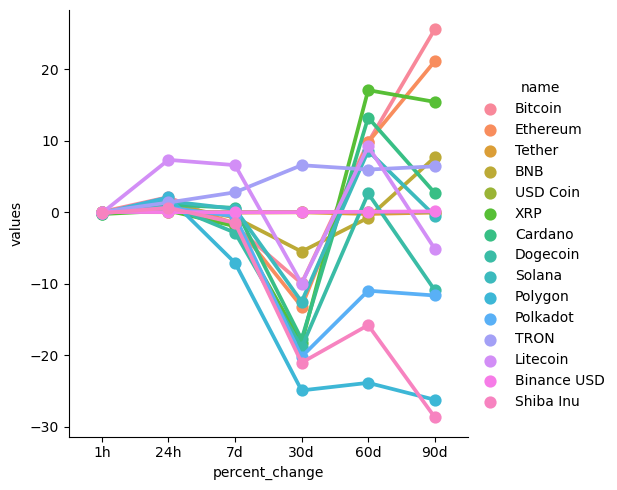

In [21]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [26]:
df8 = df[['name', 'quote.USD.price', 'timestamp']]
df8 = df8.query("name=='Bitcoin'")
df8

,name,quote.USD.price,timestamp
0,Bitcoin,27404.92236,2023-05-15 10:58:58.494967+00:00


In [27]:
sns.set_theme(style='darkgrid')

sns.lineplot(x='timestamp', y='quote.USD.price', data = df8)

<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>